In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from IPython.display import Image
print("finished loading libraries")


finished loading libraries


In [8]:
fileName= "table2.csv"
table2Df = pd.read_csv(fileName)
print(table2Df.shape)
print(table2Df.columns)

(89535, 19)
Index(['username', 'age', 'sex', 'bmi', 'psqi', 'race', 'zygosity', 'country',
       'Unnamed: 8', 'username.1', 'spt', 'se', 'sleeponset_hr',
       'sleepoffset_hr', 'Unnamed: 14', 'username.2', 'calendardate',
       'al_rating', 'mask_morning'],
      dtype='object')


C:\Users\jihad qutteineh\AppData\Local\Temp\ipykernel_6928\2529253898.py:2: DtypeWarning: Columns (0,2,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  table2Df = pd.read_csv(fileName)


In [3]:
table2Df.describe()

,age,bmi,psqi,Unnamed: 8,spt,se,sleeponset_hr,sleepoffset_hr,Unnamed: 14,al_rating
count,833.000000,833.000000,728.000000,0.0,9542.000000,9542.000000,9542.000000,9542.000000,0.0,89535.000000
mean,46.199155,25.828211,4.858322,NaN,7.659573,0.892785,-0.600365,7.059151,NaN,64.137041
std,11.928687,5.115396,2.731549,NaN,1.465608,0.058214,1.406798,1.406054,NaN,20.247562
min,18.696783,17.009625,0.000000,NaN,2.115278,0.435115,-6.616667,0.300000,NaN,0.000000
25%,38.425736,22.476724,3.000000,NaN,6.869444,0.860973,-1.450000,6.250000,NaN,51.000000
50%,47.085558,24.767550,4.000000,NaN,7.699305,0.902768,-0.750000,6.983333,NaN,66.000000
75%,55.268994,27.948291,7.000000,NaN,8.536111,0.935311,0.066667,7.816667,NaN,79.000000
max,65.916496,53.203125,17.000000,NaN,14.472222,0.998575,7.866667,11.983333,NaN,100.000000


In [4]:
table2Df["sex"].value_counts()

F    600
M    233
Name: sex, dtype: int64

In [5]:
table2Df["race"].value_counts()

White             747
Other or Mixed     33
Asian              16
African             7
Name: race, dtype: int64

In [6]:
table2Df["country"].value_counts()

GB    749
US     84
Name: country, dtype: int64

In [7]:
table2Df["zygosity"].value_counts()

NT    359
MZ    340
DZ    134
Name: zygosity, dtype: int64

In [8]:
v = table2Df.copy()
v["psqi"].fillna( table2Df["psqi"].mean() , inplace=True)
v

,username,age,sex,bmi,psqi,race,zygosity,country,Unnamed: 8,username.1,spt,se,sleeponset_hr,sleepoffset_hr,Unnamed: 14,username.2,calendardate,al_rating,mask_morning
0,predict10091,53.645448,F,25.530409,5.000000,White,MZ,GB,NaN,predict10091,8.497222,0.899150,-1.350000,7.150000,NaN,predict10091,24/01/2019,53,True
1,predict10092,53.645448,F,24.272560,8.000000,White,MZ,GB,NaN,predict10091,9.959722,0.921071,-0.650000,9.300000,NaN,predict10091,24/01/2019,54,True
2,predict10181,43.110198,F,21.620041,3.000000,White,MZ,GB,NaN,predict10091,8.426389,0.859733,0.916667,9.333333,NaN,predict10091,24/01/2019,58,True
3,predict10182,42.967830,F,22.728657,2.000000,White,MZ,GB,NaN,predict10091,9.122222,0.953715,-1.100000,8.016667,NaN,predict10091,25/01/2019,64,True
4,predict10332,62.140999,F,22.374670,4.000000,White,MZ,GB,NaN,predict10091,10.604167,0.896136,-0.900000,9.700000,NaN,predict10091,25/01/2019,31,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89530,NaN,NaN,NaN,NaN,4.858322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,predict9991,10/10/2018,79,False
89531,NaN,NaN,NaN,NaN,4.858322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,predict9991,10/10/2018,86,False
89532,NaN,NaN,NaN,NaN,4.858322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,predict9991,10/10/2018,84,False
89533,NaN,NaN,NaN,NaN,4.858322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,predict9991,10/10/2018,80,False


In [9]:
import warnings
warnings.simplefilter('ignore')

# Converting the calendardate column to datetime
table2Df['calendardate'] = pd.to_datetime(table2Df['calendardate'])
# Extracting the date from the datetime column
table2Df['calendardate'] = table2Df['calendardate'].dt.date
# Counting the occurrences of each date
date_counts = table2Df['calendardate'].value_counts()

# Summing the counts
date_sum = date_counts.sum()

# Displaying the result
print(date_sum)

89535


# Table 2

In [2]:
pip install -U prettytable

Note: you may need to restart the kernel to use updated packages.


In [24]:
from prettytable import PrettyTable

table = PrettyTable()

table.title = 'Descriptive statistics'
table.field_names = ['Feature', 'Value']
table.add_row(['No. Participants', 833])
table.add_row(['Age', '46.20 ± 11.93 yrs'])
table.add_row(['Sex', '233 M/600 F'])
table.add_row(['BMI', '25.83 ± 5.12 kg/m2'])
table.add_row(['PSQI', '4.86 ± 2.73'])
table.add_row(['Race', ' 747 White/33 Other or Mixed/16 Asian/7 Black'])
table.add_row(['Twin status', ' 359 NT/340 MZ/134 DZ'])
table.add_row(['Country',' 749 UK/84 US'])
table.add_row(['No. nights (total)',' 9,542'])
table.add_row(['Sleep duration',' 7.66 ± 0.80 hr'])
table.add_row(['Sleep efficiency',' 89 ± 5%'])
table.add_row(['Sleep offset',' 07h05 ± 0h56'])
table.add_row(['No. alertness ratings','89,535'])
table.add_row(['Alertness (all)','64.14 ± 20.25'])

print(table)

+-----------------------------------------------------------------------+
|                         Descriptive statistics                        |
+-----------------------+-----------------------------------------------+
|        Feature        |                     Value                     |
+-----------------------+-----------------------------------------------+
|    No. Participants   |                      833                      |
|          Age          |               46.20 ± 11.93 yrs               |
|          Sex          |                  233 M/600 F                  |
|          BMI          |               25.83 ± 5.12 kg/m2              |
|          PSQI         |                  4.86 ± 2.73                  |
|          Race         |  747 White/33 Other or Mixed/16 Asian/7 Black |
|      Twin status      |              359 NT/340 MZ/134 DZ             |
|        Country        |                  749 UK/84 US                 |
|   No. nights (total)  |             

# FIG 2.A

In [11]:
fileName= "fig2.csv"
fig2Df = pd.read_csv(fileName)
print(fig2Df.shape)
print(fig2Df.columns)

(89535, 2)
Index(['Time of day (hour)', 'Alertness'], dtype='object')


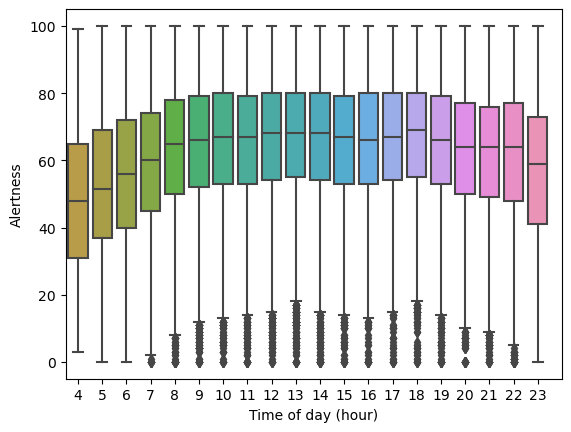

In [12]:
sns.boxplot(x="Time of day (hour)", y="Alertness", data=fig2Df)
plt.xlim(3.5,24)
plt.show()

# Supplementary Fig 3

In [13]:
fileName= "figs3.csv"
figs3Df = pd.read_csv(fileName)
print(figs3Df.shape)
print(figs3Df.columns)

(833, 2)
Index(['Trait alertness', 'Age'], dtype='object')


## regression model to extract p value and r-squared

In [14]:
import statsmodels.api as sm
X = figs3Df['Age']
Y = figs3Df['Trait alertness']

In [15]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Trait alertness   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     112.3
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           1.07e-24
Time:                        04:57:14   Log-Likelihood:                -3283.3
No. Observations:                 833   AIC:                             6571.
Df Residuals:                     831   BIC:                             6580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.0649      1.730     26.628      0.0

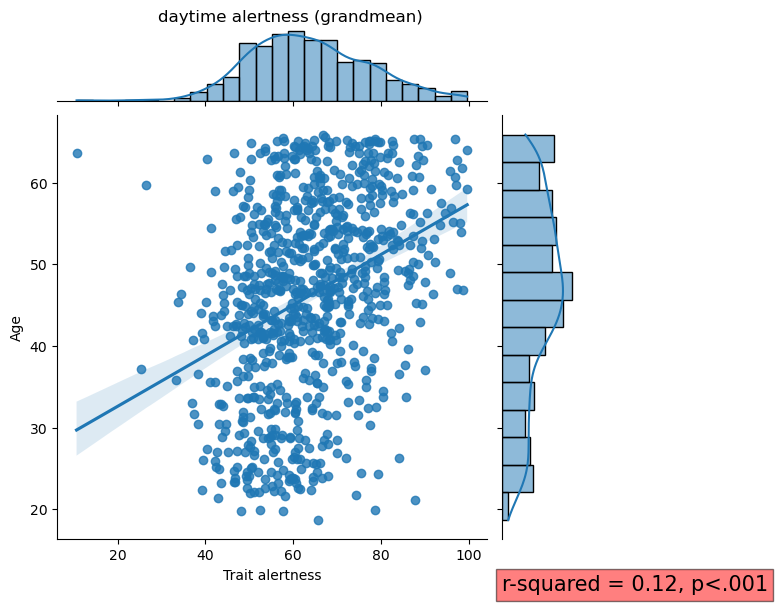

In [16]:
p=sns.jointplot(x="Trait alertness", y="Age", kind='reg', data= figs3Df)
p.fig.suptitle("daytime alertness (grandmean)")
p.fig.subplots_adjust(top=0.95)
plt.text(0, 10, 'r-squared = 0.12, p<.001', fontsize = 15, 
         bbox = dict(facecolor = 'red', alpha = 0.5))
plt.show()

# Supplementary figure 4

In [17]:
fileName= "figs4.csv"
figs4Df = pd.read_csv(fileName)
print(figs4Df.shape)
print(figs4Df.columns)

(25, 26)
Index(['Unnamed: 0', 'Alertness', 'Age', 'Sex', 'Education', 'Smoking status',
       'BMI', 'Sleep duration', 'Sleep efficiency', 'Sleep onset',
       'Sleep offset', 'Social jetlag', 'PSQI', 'Happiness',
       'Anxiety disorder', 'Depression', 'Skip breakfast',
       'Coffee consumption', 'Alcohol consumption', 'Eating frequency',
       'Snacker', 'L5 value', 'L5 clock time', 'M10 value', 'M10 clock time',
       'Self-report exercise'],
      dtype='object')


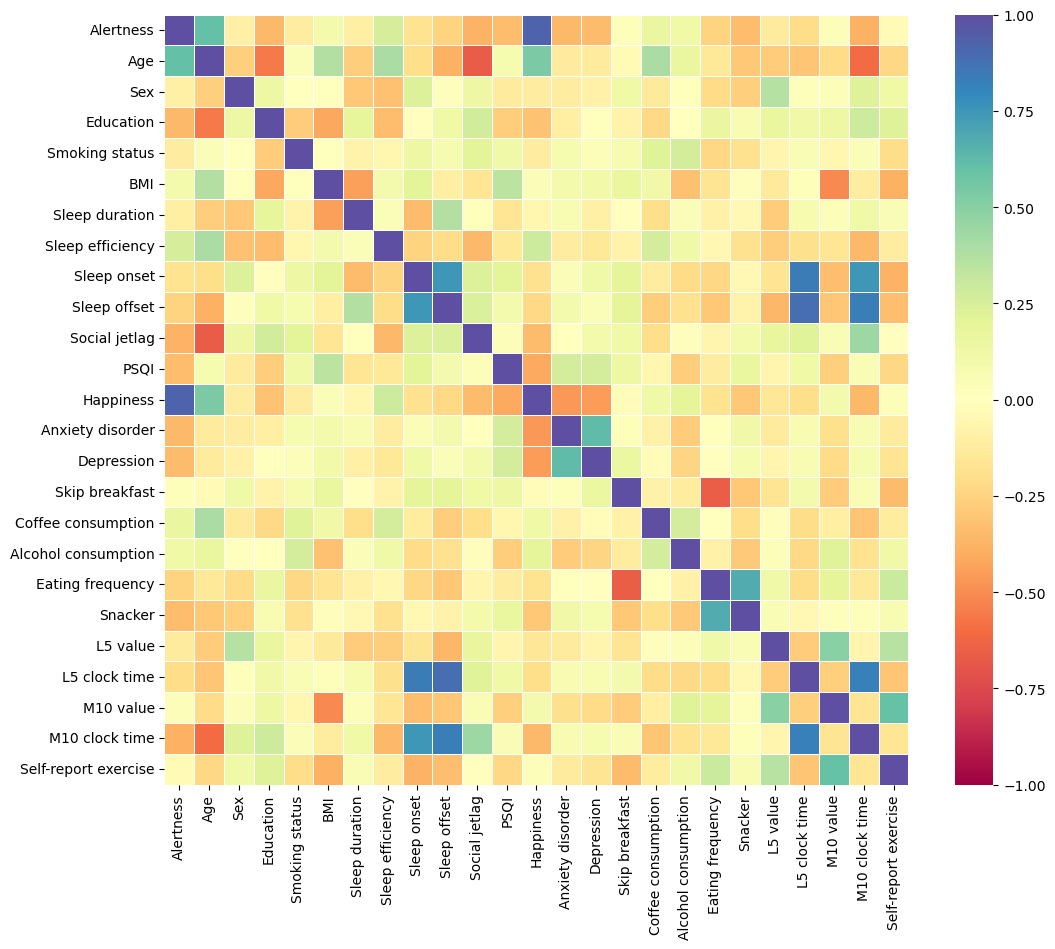

In [18]:
corr = figs4Df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr,linewidths=0.5,cmap="Spectral",vmin=-1, vmax=1)
plt.show()

In [19]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from IPython.display import Image
print('Finsihed loading libs')

Finsihed loading libs


# Supplementary table 1

In [20]:
fileName= "fig3.csv"
fig3Df = pd.read_csv(fileName)
print(fig3Df.shape)
print(fig3Df.columns)

(6744, 21)
Index(['Morning Alertness', 'se_pcen', 'spt_pcen', 'sleepoffset_hr_pcen',
       'L5VALUE', 'L5TIME_num', 'M10VALUE_daybefore', 'M10TIME_num_daybefore',
       'meal_type_breakfast', 'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age', 'sex', 'bmi', 'zygosity',
       'sunrise_hr', 'dst', 'weekend', 'family_id', 'username', 'Unnamed: 20'],
      dtype='object')


In [21]:
import statsmodels.api as sm
X = fig3Df[['se_pcen', 'spt_pcen', 'sleepoffset_hr_pcen',
       'L5VALUE', 'L5TIME_num', 'M10VALUE_daybefore', 'M10TIME_num_daybefore',
        'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age', 'bmi',
       'sunrise_hr']]
Y = fig3Df['Morning Alertness']

### We can take a look at the beta and p value from the model summary or the dataframe i created below it

In [22]:
# multiple regression using statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Morning Alertness   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     51.59
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          3.92e-119
Time:                        04:57:15   Log-Likelihood:                -29015.
No. Observations:                6744   AIC:                         5.806e+04
Df Residuals:                    6731   BIC:                         5.814e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [23]:
# Create a dataframe with the coefficients and p-values
data = {'beta': model.params, 'p_value': model.pvalues,"R squared":model.rsquared, "No. observations": model.nobs}
df_coef = pd.DataFrame(data, index=X.columns)

##df_coef.append(pd.Series(RSquared, index=df_coef.columns[:len(str(model.rsquared))]), ignore_index=True)
##df_coef.append(pd.Series(Observations, index=df_coef.columns[:len(str(model.nobs))]), ignore_index=True)

##df_coef.loc["R-Squared"] = [model.rsquared]
##df_coef.loc["Observations"] = [model.nobs]

# Display the table
print(df_coef)

                                  beta       p_value  R squared  \
const                        50.037291  4.194194e-65   0.084225   
se_pcen                       1.261961  8.195297e-01   0.084225   
spt_pcen                      0.815656  4.324850e-04   0.084225   
sleepoffset_hr_pcen           0.854889  2.476580e-03   0.084225   
L5VALUE                      -0.068765  4.049703e-01   0.084225   
L5TIME_num                   -0.139920  3.545749e-01   0.084225   
M10VALUE_daybefore            0.036022  8.559081e-04   0.084225   
M10TIME_num_daybefore        -0.077253  4.622127e-01   0.084225   
meal_log_iauc_breakfast      -4.692155  5.456687e-11   0.084225   
meal_offset_to_breakfast_hr   2.558724  1.604091e-37   0.084225   
age                           0.376413  7.959056e-81   0.084225   
bmi                          -0.060779  1.649143e-01   0.084225   
sunrise_hr                   -0.393801  2.306597e-01   0.084225   

                             No. observations  
const        

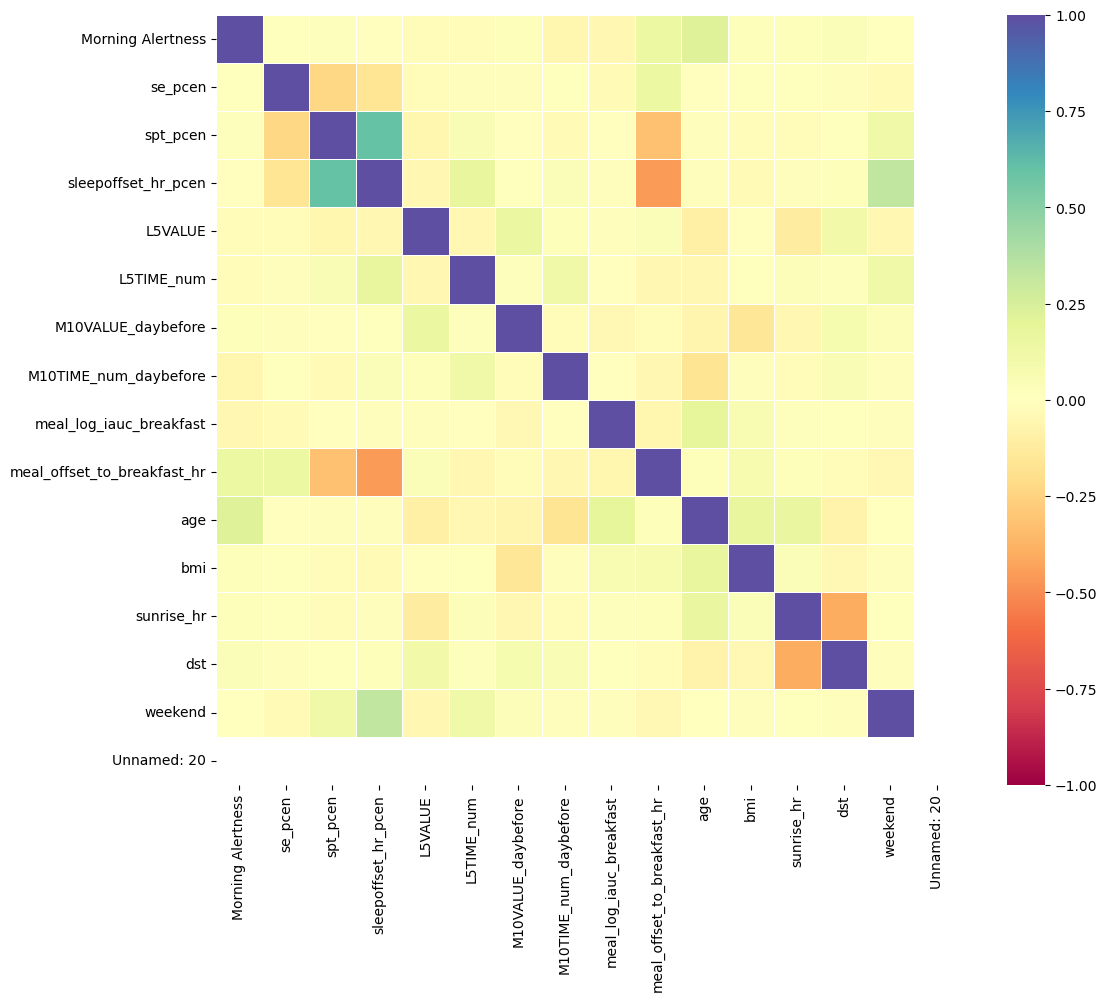

In [24]:
corr = fig3Df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr,linewidths=0.5,cmap="Spectral",vmin=-1, vmax=1)
plt.show()

# now for the multiple regression model to predict morning alertness

In [25]:
fileName= "fig3.csv"
mlnDf = pd.read_csv(fileName)
print(mlnDf.shape)
print(mlnDf.columns)

(6744, 21)
Index(['Morning Alertness', 'se_pcen', 'spt_pcen', 'sleepoffset_hr_pcen',
       'L5VALUE', 'L5TIME_num', 'M10VALUE_daybefore', 'M10TIME_num_daybefore',
       'meal_type_breakfast', 'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age', 'sex', 'bmi', 'zygosity',
       'sunrise_hr', 'dst', 'weekend', 'family_id', 'username', 'Unnamed: 20'],
      dtype='object')


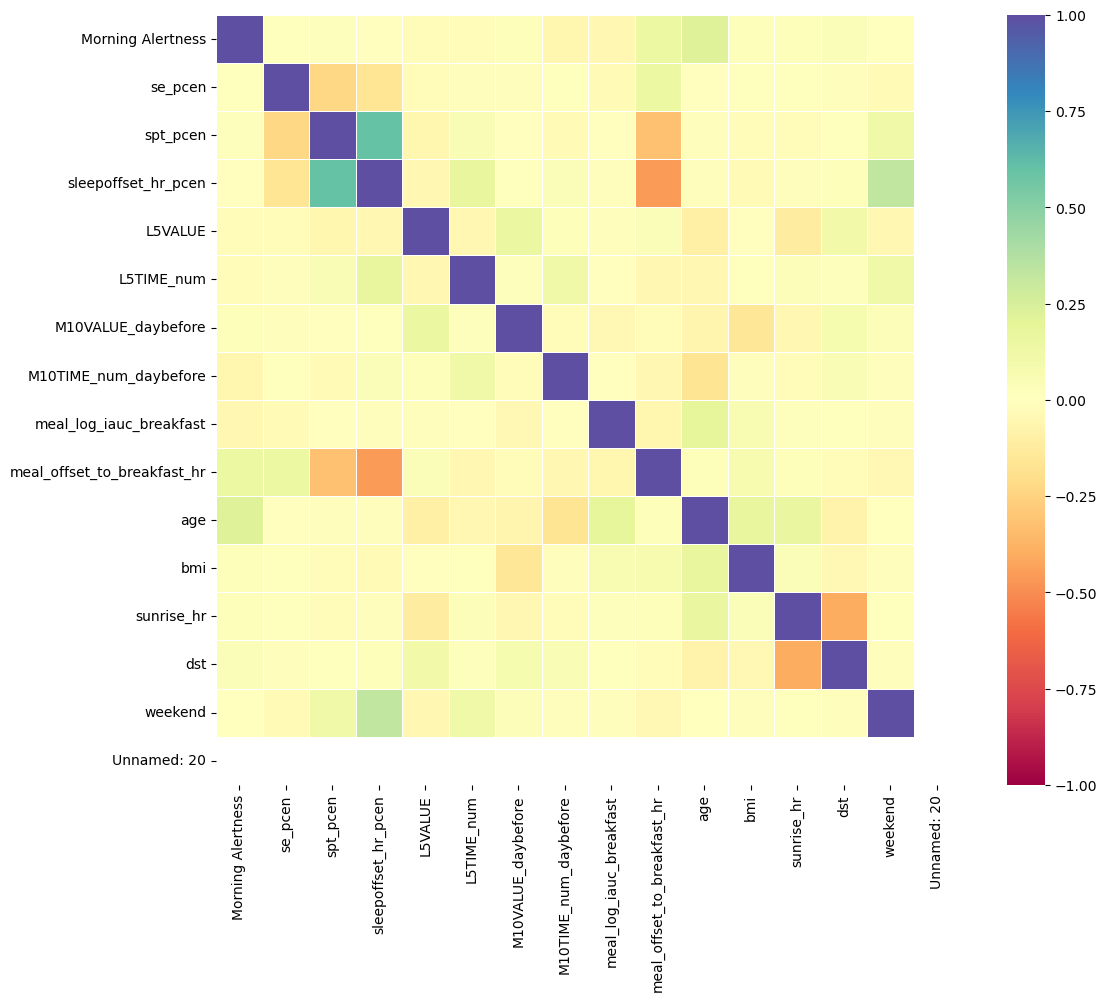

In [26]:
corr = mlnDf.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr,linewidths=0.5,cmap="Spectral",vmin=-1, vmax=1)
plt.show()

In [27]:
import statsmodels.api as sm
X = mlnDf[['se_pcen', 'spt_pcen', 'sleepoffset_hr_pcen',
       'L5VALUE', 'L5TIME_num', 'M10VALUE_daybefore', 'M10TIME_num_daybefore',
       'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age', 'bmi',
       'sunrise_hr']]
Y = mlnDf['Morning Alertness']

In [28]:

# multiple regression using statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Morning Alertness   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     51.59
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          3.92e-119
Time:                        04:57:16   Log-Likelihood:                -29015.
No. Observations:                6744   AIC:                         5.806e+04
Df Residuals:                    6731   BIC:                         5.814e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Figure 3 (i created both a forest plot and a positive negative bar plot because i wasnt sure if either is right or not)

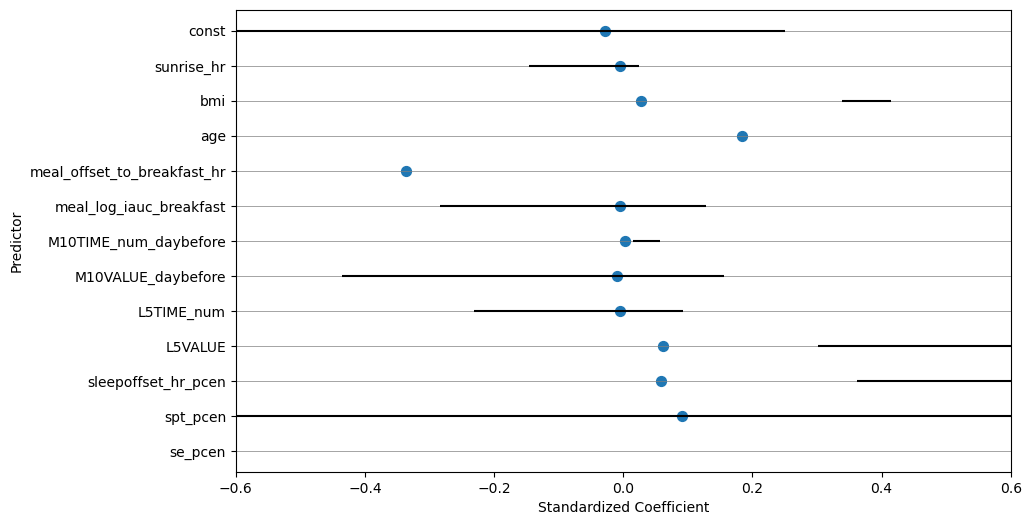

In [29]:
##extracting parameters
coefficients = model.params
confidence_intervals = model.conf_int()
predictors = ['se_pcen', 'spt_pcen', 'sleepoffset_hr_pcen', 'L5VALUE', 'L5TIME_num', 'M10VALUE_daybefore', 'M10TIME_num_daybefore','meal_log_iauc_breakfast', 'meal_offset_to_breakfast_hr', 'age', 'bmi','sunrise_hr','const']


##standardizing the coefficients
params_std = coefficients / model.params.std()

# Creating the forest plot
plt.figure(figsize=(10, 6))
plt.hlines(y=range(len(predictors)), xmin=-1, xmax=1, color='gray', linewidth=0.5)
plt.hlines(y=range(len(predictors)), xmin=confidence_intervals.loc[:, 0], xmax=confidence_intervals.loc[:, 1], color='black')
plt.scatter(x=params_std, y=range(len(predictors)), s=50)
plt.yticks(range(len(predictors)), predictors)
plt.xlabel('Standardized Coefficient')
plt.ylabel('Predictor')
plt.xlim(-0.6,0.6)
plt.show()

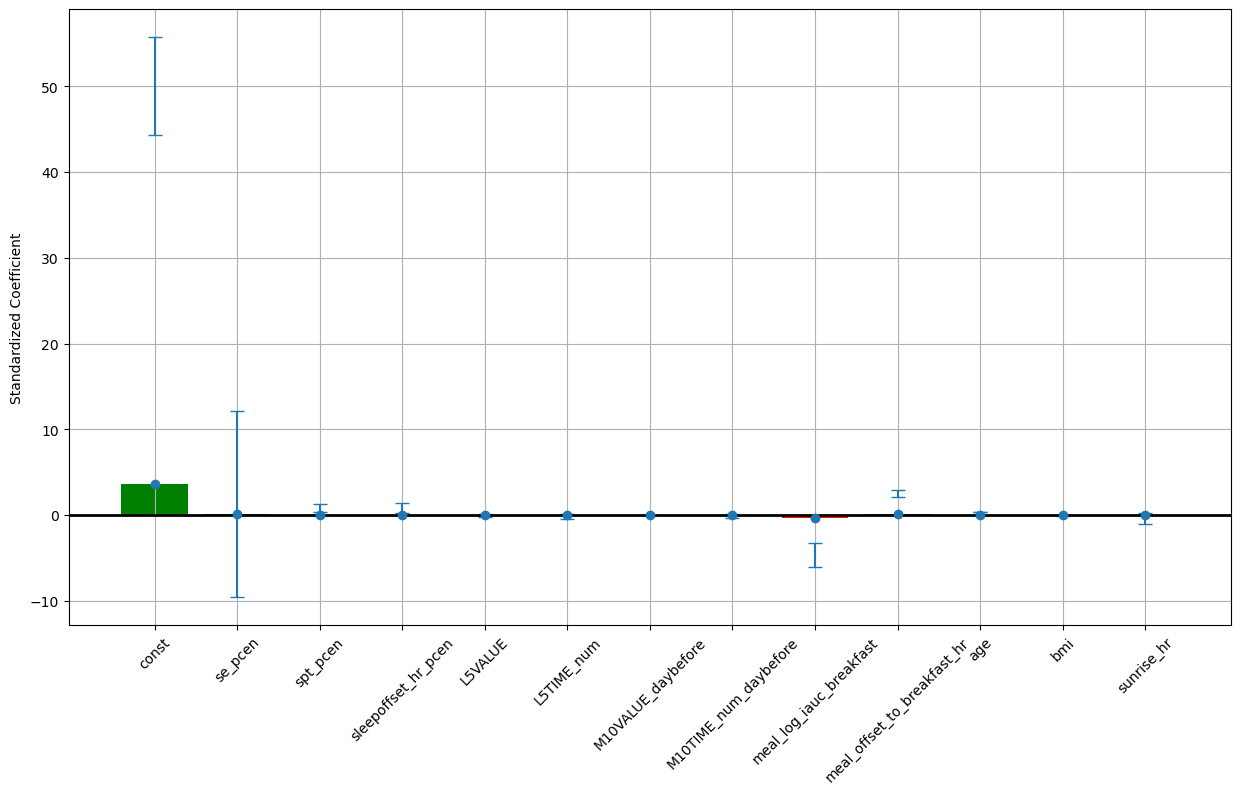

In [30]:
params = model.params
pvalues = model.pvalues
conf_int = model.conf_int()

# Standardize the coefficients
params_std = params / params.std()

# Create a dataframe with the coefficients, confidence intervals, and p-values
data = {'coef': params_std, 'conf_int_low': conf_int[0], 'conf_int_high': conf_int[1], 'p_value': pvalues}
df_coef = pd.DataFrame(data, index=X.columns)

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(df_coef.index, df_coef['coef'], color=['green' if c > 0 else 'red' for c in df_coef['coef']])

# Add error bars for the confidence intervals
ax.errorbar(df_coef.index, df_coef['coef'], yerr=[df_coef['coef'] - df_coef['conf_int_low'], df_coef['conf_int_high'] - df_coef['coef']], fmt='o', capsize=5)

# Add labels and a grid
ax.set_ylabel('Standardized Coefficient')
ax.grid(visible=True)
ax.axhline(y=0, color='black', linewidth=2)
plt.xticks(rotation=45)
plt.show()

## Backward elimination (feature selection)

#### Now i will start using the backward elimnation technique to select the best features for our model

In [31]:
## I will start by removing the features ith the highest P value and so on
## First features i will remove will be se_pcen, L5VALUE, L5TIME_num and M10TIME_num_daybefore
X = mlnDf[['spt_pcen', 'sleepoffset_hr_pcen',
       'M10VALUE_daybefore',
       'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age', 'bmi',
       'sunrise_hr']]
Y = mlnDf['Morning Alertness']


In [32]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Morning Alertness   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     77.12
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          2.48e-122
Time:                        04:57:17   Log-Likelihood:                -29016.
No. Observations:                6744   AIC:                         5.805e+04
Df Residuals:                    6735   BIC:                         5.811e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [33]:
## i will continue removing features with the highest P value until we get a satisfactory result
X = mlnDf[['spt_pcen', 'sleepoffset_hr_pcen',
       'M10VALUE_daybefore',
       'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age', 'bmi']]
Y = mlnDf['Morning Alertness']

In [34]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Morning Alertness   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     87.94
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          5.02e-123
Time:                        04:57:17   Log-Likelihood:                -29016.
No. Observations:                6744   AIC:                         5.805e+04
Df Residuals:                    6736   BIC:                         5.810e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [35]:
X = mlnDf[['spt_pcen', 'sleepoffset_hr_pcen',
       'M10VALUE_daybefore',
       'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age']]
Y = mlnDf['Morning Alertness']

In [36]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Morning Alertness   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     102.2
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          1.36e-123
Time:                        04:57:17   Log-Likelihood:                -29018.
No. Observations:                6744   AIC:                         5.805e+04
Df Residuals:                    6737   BIC:                         5.810e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [37]:
X = mlnDf[['spt_pcen',
       'M10VALUE_daybefore',
       'meal_log_iauc_breakfast',
       'meal_offset_to_breakfast_hr', 'age']]
Y = mlnDf['Morning Alertness']

In [38]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Morning Alertness   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     120.9
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          6.63e-123
Time:                        04:57:17   Log-Likelihood:                -29022.
No. Observations:                6744   AIC:                         5.806e+04
Df Residuals:                    6738   BIC:                         5.810e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [39]:
X

,const,spt_pcen,M10VALUE_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age
0,1.0,0.926686,48.365305,0.777249,-0.209444,53.645448
1,1.0,0.089186,17.615711,1.012362,1.586944,53.645448
2,1.0,1.571131,56.711167,0.774941,0.625833,53.645448
3,1.0,0.091072,54.159403,0.864187,2.024722,53.645448
4,1.0,-0.175595,48.373843,1.248574,2.816667,53.645448
...,...,...,...,...,...,...
6739,1.0,-1.448016,38.509619,1.688164,0.947222,55.822040
6740,1.0,1.029762,47.939220,1.493164,0.111111,55.822040
6741,1.0,-0.141071,24.526739,1.896814,0.264167,55.822040
6742,1.0,-0.886905,40.709453,1.604433,-1.285833,55.822040


In [40]:
model.predict(X)

0       63.706689
1       64.625449
2       66.756820
3       67.742896
4       67.206813
          ...    
6739    59.631167
6740    61.922234
6741    58.055663
6742    55.555417
6743    61.288450
Length: 6744, dtype: float64

In [41]:
tbl = pd.DataFrame({'Actual': Y, 'Predicted':  model.predict(X)})
tbl

,Actual,Predicted
0,47.250000,63.706689
1,51.750000,64.625449
2,59.000000,66.756820
3,50.000000,67.742896
4,53.800000,67.206813
...,...,...
6739,67.333333,59.631167
6740,69.666667,61.922234
6741,66.000000,58.055663
6742,72.666667,55.555417


## now i will use sklearn to write the model in an equation form

In [42]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X,Y)

# Make predictions on the test data
y_pred = reg.predict(X)

# Print the coefficients
coefficients = reg.coef_
intercept = reg.intercept_

# Get the names of the input variables
input_vars = list(X.columns)

# Write the equation in the form of y = b0 + b1*x1 + b2*x2 + ... + bn*xn
equation = "y = " + str(intercept)
for i in range(len(input_vars)):
    equation += " + " + str(coefficients[i]) + "*" + input_vars[i]

print(equation)

y = 44.95198668944088 + 0.0*const + 1.192117785652445*spt_pcen + 0.03760119910982652*M10VALUE_daybefore + -4.82856097718885*meal_log_iauc_breakfast + 2.342832612874975*meal_offset_to_breakfast_hr + 0.3742177343229087*age


In [43]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, y_pred)
print(mse)

320.1433429402249


In [44]:
from math import sqrt

rmse = sqrt(mse)
print(rmse)

17.892549928398267
